# Data preprocessing
- Imported Data from CSV
- Removed irrelavant data(NAN)
- Plotted ax and ay wrt time

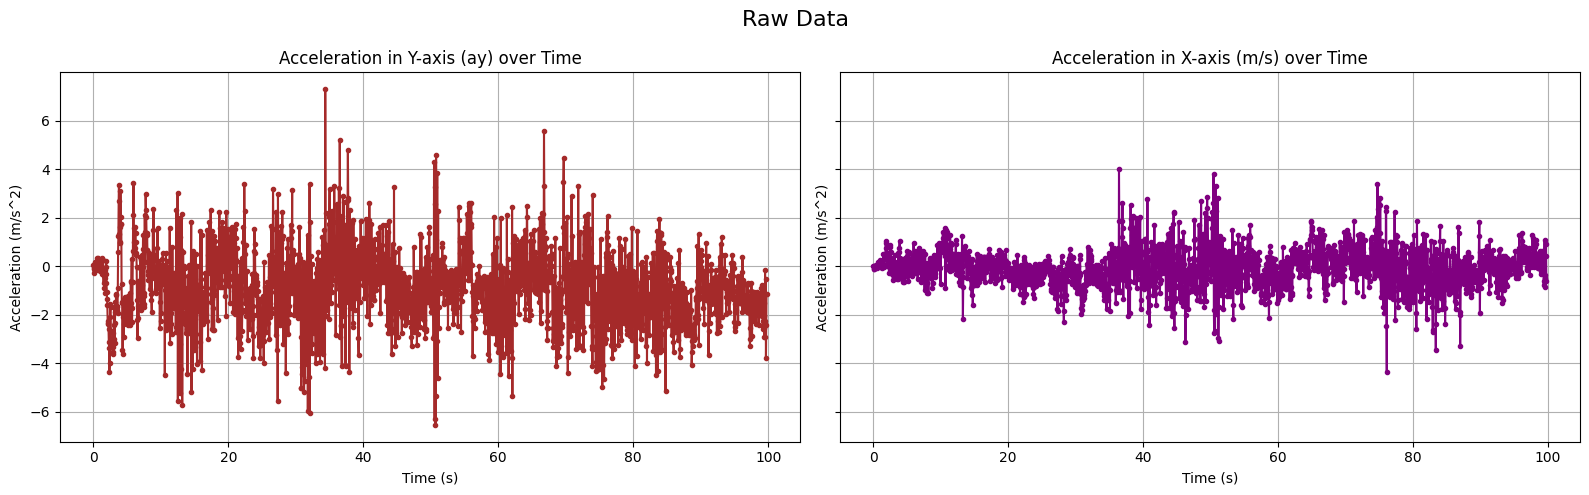

In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

df = pd.read_csv('round1.csv')
# print(df.to_string())

df = df.dropna()
# print(df.to_string())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
fig.suptitle('Raw Data', fontsize=16)
ax1.plot(df['time'], df['ay'], marker='o', linestyle='-', color='brown', markersize=3)
ax1.set_title('Acceleration in Y-axis (ay) over Time') 
ax1.set_xlabel('Time (s)') 
ax1.set_ylabel('Acceleration (m/s^2)') 
ax1.grid(True)

ax2.plot(df['time'], df['ax'], marker='o', linestyle='-', color='purple', markersize=3) 
ax2.set_title('Acceleration in X-axis (m/s) over Time') 
ax2.set_xlabel('Time (s)') 
ax2.set_ylabel('Acceleration (m/s^2)') 
ax2.grid(True)

plt.tight_layout() 
plt.show()


# DC Bias Removal(Sensor Calibration)

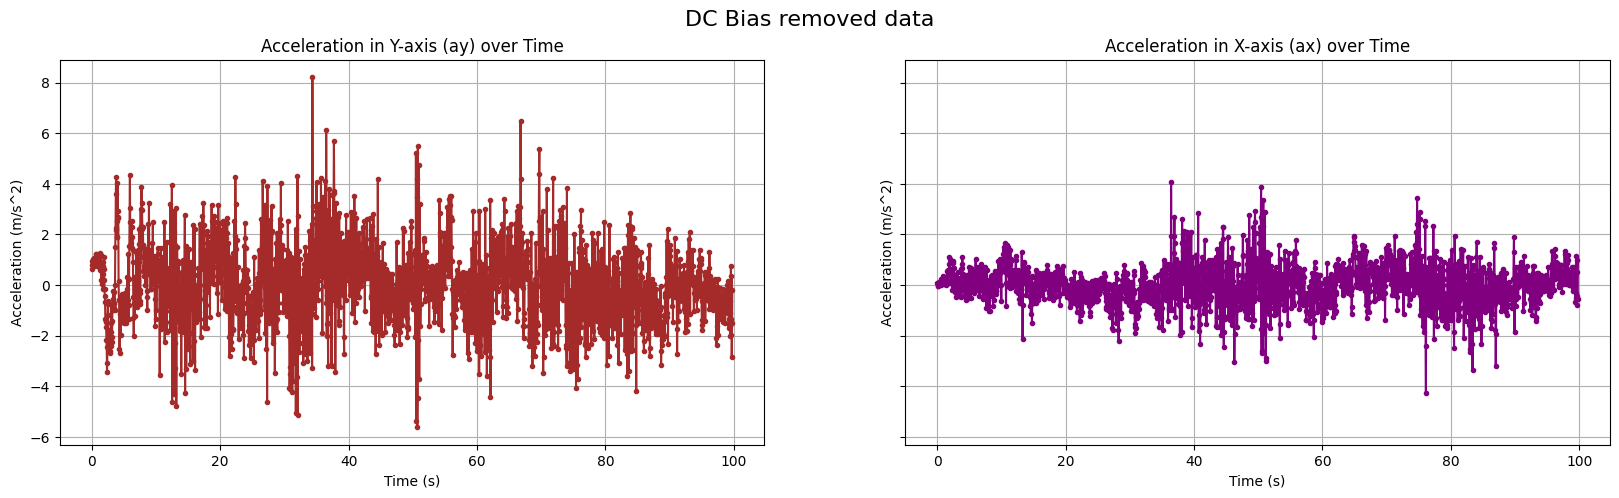

In [359]:
df['ay_bias'] = df['ay'].copy()  # Make a copy of ay
df['ax_bias'] = df['ax'].copy()  # Make a copy of ax

ay_mean = df['ay_bias'].mean()
ax_mean = df['ax_bias'].mean()

for i in range (0,len(df)):
    df.loc[i, 'ay_bias'] = df.loc[i, 'ay_bias'] - ay_mean
    df.loc[i, 'ax_bias'] = df.loc[i, 'ax_bias'] - ax_mean

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('DC Bias removed data', fontsize=16)
ax1.plot(df['time'], df['ay_bias'], marker='o', linestyle='-', color='brown', markersize=3)
ax1.set_title('Acceleration in Y-axis (ay) over Time') 
ax1.set_xlabel('Time (s)') 
ax1.set_ylabel('Acceleration (m/s^2)') 
ax1.grid(True)

ax2.plot(df['time'], df['ax_bias'], marker='o', linestyle='-', color='purple', markersize=3) 
ax2.set_title('Acceleration in X-axis (ax) over Time') 
ax2.set_xlabel('Time (s)') 
ax2.set_ylabel('Acceleration (m/s^2)') 
ax2.grid(True)



# Exponential Moving Average Filter

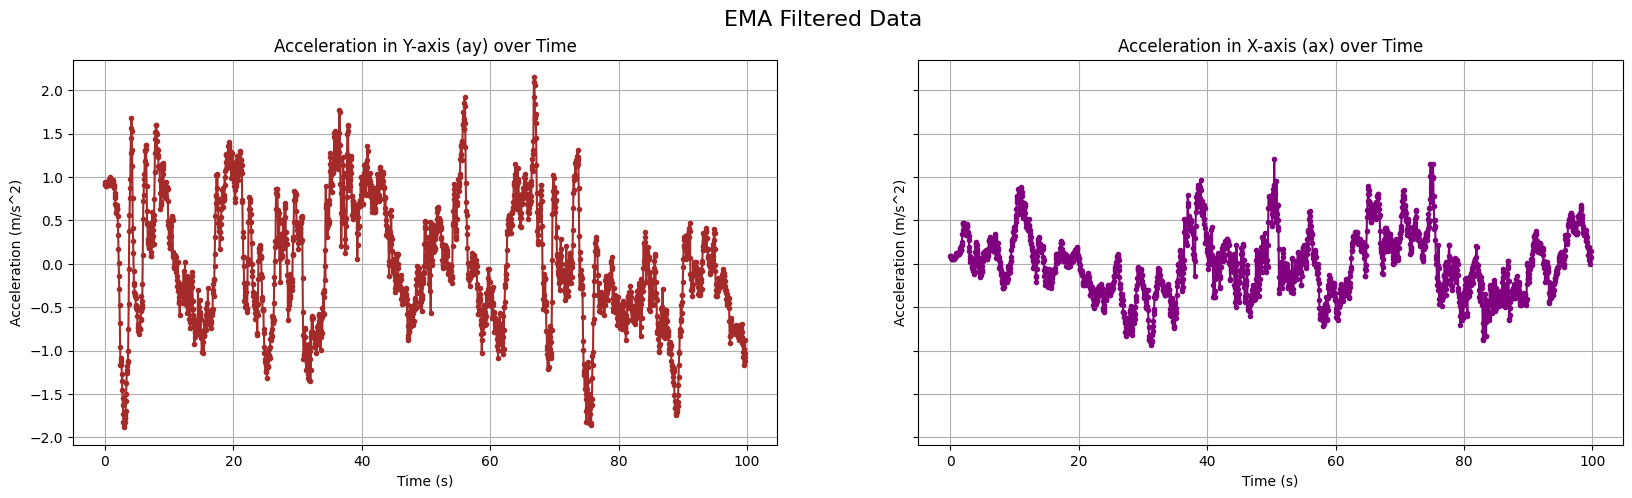

In [360]:
df['ay_ema'] = df['ay_bias'].copy()  # Make a copy of dc bias removed ay
df['ax_ema'] = df['ax_bias'].copy()  # Make a copy of dc bias removed ax

# Apply EMA filter
for i in range(1, len(df)):
    df.loc[i, 'ay_ema'] = df.loc[i - 1, 'ay_ema'] * 0.90 + df.loc[i, 'ay_bias'] * 0.1
    df.loc[i, 'ax_ema'] = df.loc[i - 1, 'ax_ema'] * 0.90 + df.loc[i, 'ax_bias'] * 0.1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('EMA Filtered Data', fontsize=16)
ax1.plot(df['time'], df['ay_ema'], marker='o', linestyle='-', color='brown', markersize=3)
ax1.set_title('Acceleration in Y-axis (ay) over Time') 
ax1.set_xlabel('Time (s)') 
ax1.set_ylabel('Acceleration (m/s^2)') 
ax1.grid(True)

ax2.plot(df['time'], df['ax_ema'], marker='o', linestyle='-', color='purple', markersize=3) 
ax2.set_title('Acceleration in X-axis (ax) over Time') 
ax2.set_xlabel('Time (s)') 
ax2.set_ylabel('Acceleration (m/s^2)') 
ax2.grid(True)

# Velocity Estimation

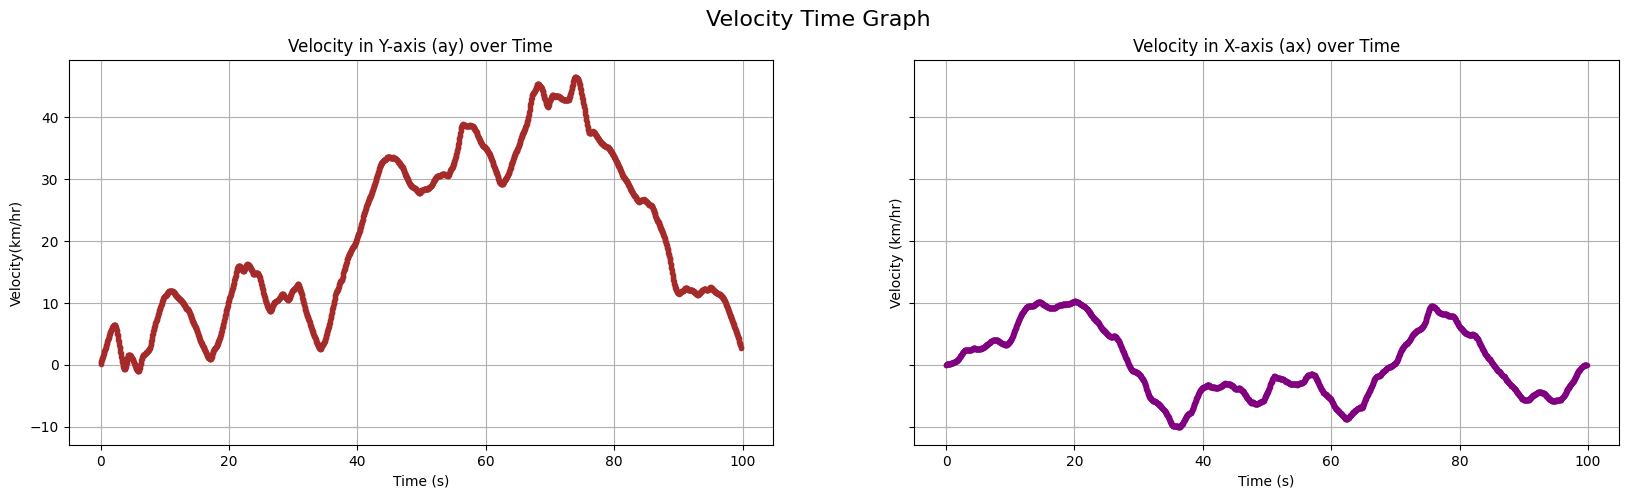

In [361]:
df['vy'] = df['ay_ema'].copy()  # Copy ay for Velocity estimation
df['vx'] = df['ax_ema'].copy()  # Copy ax for Velocity estimation

for i in range(1,len(df)):
    df.loc[i, 'vy'] = (df.loc[i - 1, 'vy'] + df.loc[i, 'ay_ema'] ) 
    df.loc[i, 'vx'] = (df.loc[i - 1, 'vx'] + df.loc[i, 'ax_ema'] ) 

df['vy'] = df['vy'] /23  # Divide by 23 since 23 samples/s
df['vx'] = df['vx'] /23 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('Velocity Time Graph', fontsize=16)
ax1.plot(df['time'], df['vy']*18/5, marker='o', linestyle='-', color='brown', markersize=3)
ax1.set_title('Velocity in Y-axis (ay) over Time') 
ax1.set_xlabel('Time (s)') 
ax1.set_ylabel('Velocity(km/hr)') 
ax1.grid(True)

ax2.plot(df['time'], df['vx']*18/5, marker='o', linestyle='-', color='purple', markersize=3) 
ax2.set_title('Velocity in X-axis (ax) over Time') 
ax2.set_xlabel('Time (s)') 
ax2.set_ylabel('Velocity (km/hr)') 
ax2.grid(True)


# Distance Estimation

Distance travelled in X-axis: 0.6888936899480671
Distance travelled in Y-axis: 586.0227282138862
Net Distance: 586.0231331251032


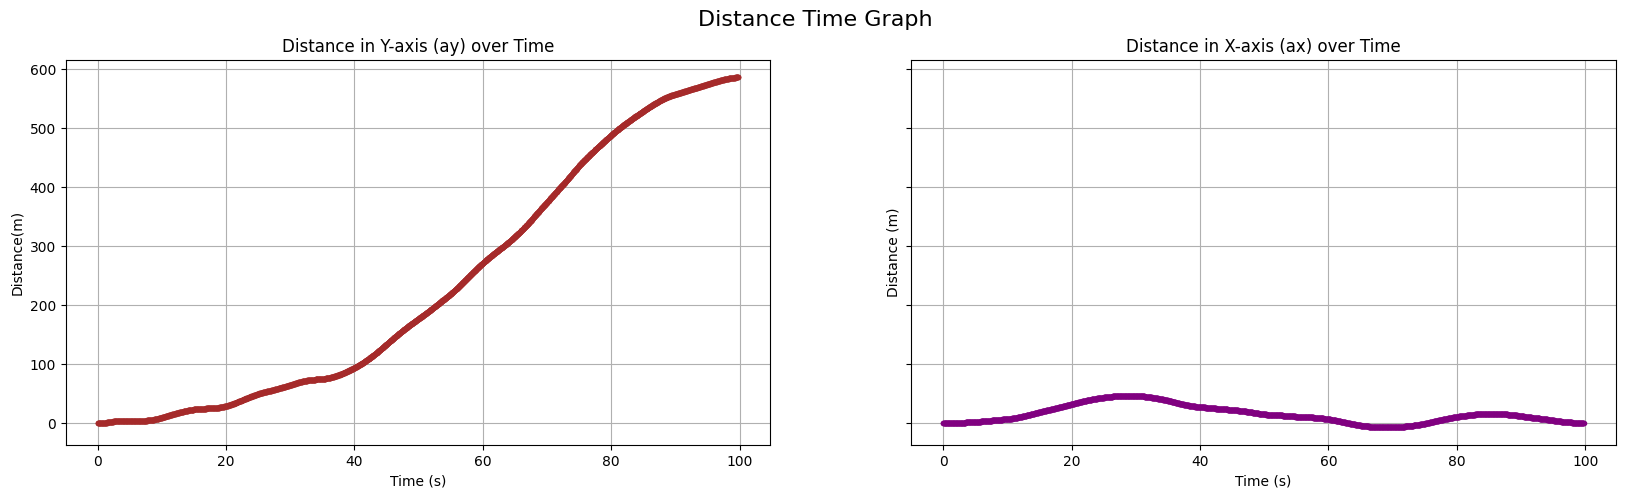

In [393]:
df['sy'] = df['vy'].copy()  # Copy ay for Velocity estimation
df['sx'] = df['vx'].copy()  # Copy ax for Velocity estimation

for i in range(1,len(df)):
    df.loc[i, 'sy'] = (df.loc[i - 1, 'sy'] + df.loc[i, 'vy'] )
    df.loc[i, 'sx'] = (df.loc[i - 1, 'sx'] + df.loc[i, 'vx']) 

df['sy'] = df['sy'] /23  # Divide by 23 since 23 samples/s
df['sx'] = df['sx'] /23 

dx = df['sx'].iloc[-1]
dy = df['sy'].iloc[-1]
distance = math.sqrt(dx**2 + dy**2)
print('Distance travelled in X-axis:',dx)
print('Distance travelled in Y-axis:',dy)
print('Net Distance:',distance)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('Distance Time Graph', fontsize=16)
ax1.plot(df['time'], df['sy'], marker='o', linestyle='-', color='brown', markersize=3)
ax1.set_title('Distance in Y-axis (ay) over Time') 
ax1.set_xlabel('Time (s)') 
ax1.set_ylabel('Distance(m)') 
ax1.grid(True)

ax2.plot(df['time'], df['sx'], marker='o', linestyle='-', color='purple', markersize=3) 
ax2.set_title('Distance in X-axis (ax) over Time') 
ax2.set_xlabel('Time (s)') 
ax2.set_ylabel('Distance (m)') 
ax2.grid(True)
# print(df.to_string())

# Converting Distances to Global frame of reference(NWU)

Distance travelled in North: 501.5557655855817
Distance travelled in West: 303.092274011766
Net Distance: 586.0231331251032


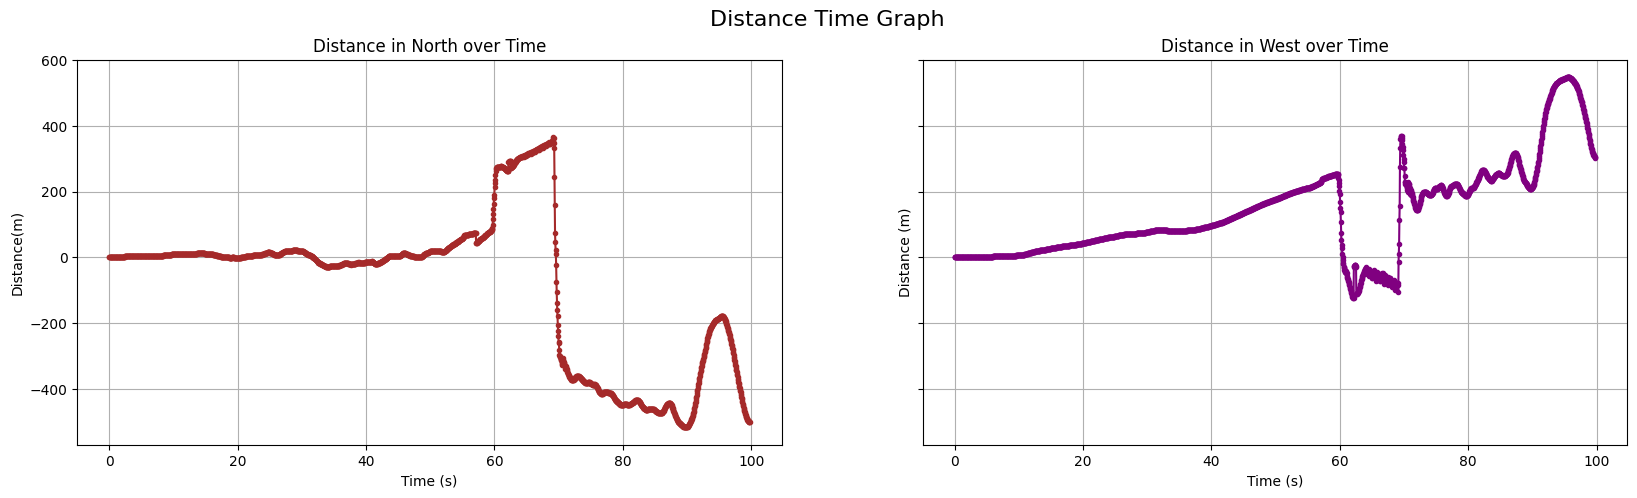

In [398]:
df['Dn'] = df['sx'] * np.cos(np.radians(df['yaw'])) - df['sy'] * np.sin(np.radians(df['yaw']))
df['Dw'] = -df['sx'] * np.sin(np.radians(df['yaw'])) - df['sy'] * np.cos(np.radians(df['yaw']))

df['distance'] = np.sqrt(df['Dn']**2 + df['Dw']**2)
print('Distance travelled in North:',-df['Dn'].iloc[-1])
print('Distance travelled in West:',df['Dw'].iloc[-1])
print('Net Distance:',df['distance'].iloc[-1])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), sharey=True)

fig.suptitle('Distance Time Graph', fontsize=16)
ax1.plot(df['time'], df['Dn'], marker='o', linestyle='-', color='brown', markersize=3)
ax1.set_title('Distance in North over Time') 
ax1.set_xlabel('Time (s)') 
ax1.set_ylabel('Distance(m)') 
ax1.grid(True)

ax2.plot(df['time'], df['Dw'], marker='o', linestyle='-', color='purple', markersize=3) 
ax2.set_title('Distance in West over Time') 
ax2.set_xlabel('Time (s)') 
ax2.set_ylabel('Distance (m)') 
ax2.grid(True)
# print(df.to_string())


# Latitude and Longitude Calculation

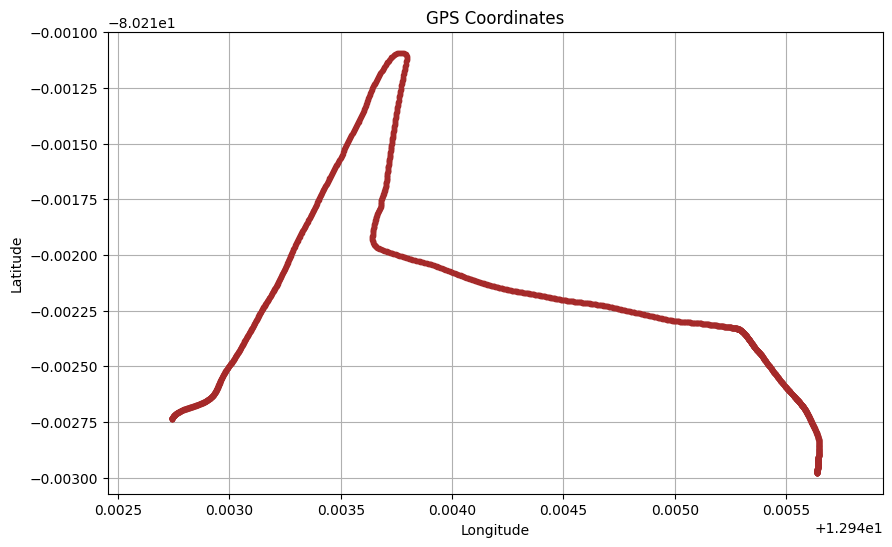

In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df, initial_lat, initial_lon are already defined
#linear  lat = 12.945640, lon = 80.212978
#cirular 12.945866, lon = 80.212048
initial_lat = 12.945640
initial_lon = 80.212978

# Set initial coordinates
df.loc[0, 'pred_lat'] = initial_lat
df.loc[0, 'pred_lon'] = initial_lon

# Function to convert distance and heading to new coordinates
def convert_distance_to_coordinates(lat1, lon1, distance, heading):
    # Convert degrees to radians
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    heading_rad = np.radians(heading)

    # Convert distance to radians
    delta = distance / 6371000  # Earth's radius in meters

    # Calculate final latitude and longitude
    lat2_rad = np.arcsin(np.sin(lat1_rad) * np.cos(delta) + np.cos(lat1_rad) * np.sin(delta) * np.cos(heading_rad))
    lon2_rad = lon1_rad + np.arctan2(np.sin(heading_rad) * np.sin(delta) * np.cos(lat1_rad),
                                      np.cos(delta) - np.sin(lat1_rad) * np.sin(lat2_rad))

    # Convert radians back to degrees
    lat2 = np.degrees(lat2_rad)
    lon2 = np.degrees(lon2_rad)

    return lat2, lon2

# Loop to calculate and update coordinates
for i in range(1, len(df)):
    lat, lon = convert_distance_to_coordinates(df.loc[i - 1, 'pred_lat'], df.loc[i - 1, 'pred_lon'], df.loc[i, 'distance']-df.loc[i-1, 'distance'], df.loc[i, 'yaw'])
    df.loc[i, 'pred_lat'] = lat
    df.loc[i, 'pred_lon'] = lon

# Plotting the path
plt.figure(figsize=(10, 6))  
plt.plot(df['pred_lat'] , df['pred_lon']*-1, marker='o', linestyle='-', color='brown', markersize=3)
plt.title('GPS Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.axis('equal')  # Set equal scale for x and y axes
plt.show()

# print(df.to_string())

# Actual path travelled

In [365]:

new_df = df[['time', 'ax', 'ay', 'az', 'yaw', 'gps_lat', 'gps_lon', 'distance', 'pred_lat', 'pred_lon']].copy()

# Convert the new dataframe to a CSV file
# print(new_df.to_string())   
# new_df.to_csv('new_data1.csv', index=False)


        time      ax       ay       az       yaw    gps_lat    gps_lon    distance   pred_lat   pred_lon
0      0.000  0.0166  0.03685   9.8658    0.0000  12.945866  80.212048    0.001800  12.945640  80.212978
1      0.043  0.0237 -0.27918   9.8143  340.3018   0.000000   0.000000    0.005341  12.945640  80.212978
2      0.086  0.0106 -0.11066   9.9268  322.0084   0.000000   0.000000    0.010601  12.945640  80.212978
3      0.129 -0.1103 -0.08030   9.8741  306.9310   0.000000   0.000000    0.017563  12.945640  80.212978
4      0.172 -0.1115  0.00924   9.9292  295.6838   0.000000   0.000000    0.026230  12.945640  80.212978
5      0.215 -0.0601  0.12903   9.6766  287.8154   0.000000   0.000000    0.036628  12.945640  80.212978
6      0.258 -0.0038  0.05005   9.8011  282.4937   0.000000   0.000000    0.048766  12.945640  80.212978
7      0.301 -0.0098  0.17248   9.7820  278.9474   0.000000   0.000000    0.062675  12.945640  80.212978
8      0.344  0.0477 -0.15543   9.7904  276.5872   0.00

In [366]:
import numpy as np
from math import radians, sin, cos, sqrt, atan2

# Filter the dataframe to exclude rows where gps_lat and gps_lon are zero
filtered_df = df[(df['gps_lat'] != 0) & (df['gps_lon'] != 0)]

def haversine(lat1, lon1, lat2, lon2):
    # Convert coordinates from degrees to radians
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    # Haversine formula
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = sin(dlat / 2) ** 2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = 6371000 * c  # Earth's radius in meters
    return distance


lat1 , lon1 = (12.945640 , 80.212978)

lat2 , lon2 = (12.944002,  80.212616)
havtest = haversine(lat1, lon1, lat2, lon2)
print(havtest)

# Calculate distances between corresponding GPS and predicted points with debugging info
distances = []
for i, (gps_lat, gps_lon, pred_lat, pred_lon) in enumerate(zip(
        filtered_df['gps_lat'], filtered_df['gps_lon'],
        filtered_df['pred_lat'], filtered_df['pred_lon'])):
    
    # Calculate the distance and add it to the list
    distance = haversine(gps_lat, gps_lon, pred_lat, pred_lon)
    distances.append(distance)
    
    # Debugging output for the first few calculations

    # print(f"Index {i}: GPS({gps_lat}, {gps_lon}), IMU({pred_lat}, {pred_lon}), Distance: {distance:.2f} meters")

# Calculate MAE and RMSE
mae = np.mean(np.abs(distances))
rmse = np.sqrt(np.mean(np.array(distances)**2))

print(f"Mean Absolute Error (MAE): {mae:.2f} meters")
print(f"Root Mean Square Error (RMSE): {rmse:.2f} meters")


186.3141258054509
Mean Absolute Error (MAE): 306.52 meters
Root Mean Square Error (RMSE): 353.58 meters


/home/karthick/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/karthick/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


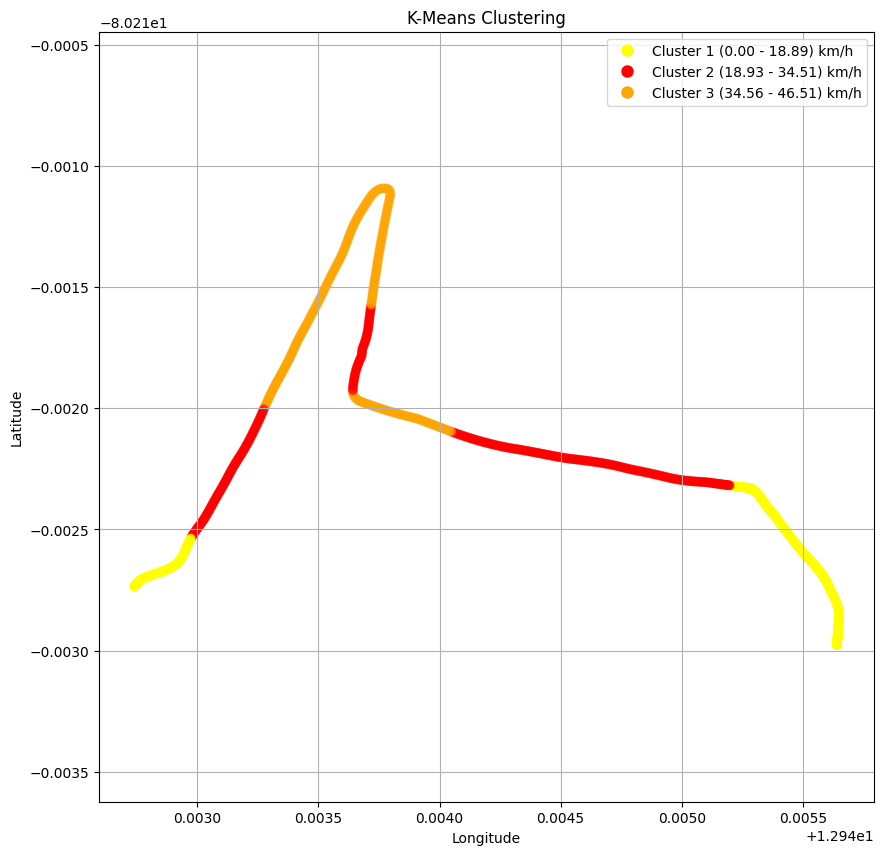

In [392]:
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Convert vy to km/h
df['vy_kmph'] = df['vy'] * 3.6

# Perform k-means clustering using the velocity in km/h
kmeans = KMeans(n_clusters=3, init=np.array([[0], [(df['vy_kmph']).mean()], [max(df['vy_kmph'])]]), random_state=0)
df['cluster'] = kmeans.fit_predict(df[['vy_kmph']])

# Define color map and create legend labels with min and max speeds for each cluster
colors = ['yellow', 'red', 'orange']
speed_range = []

# Calculate min and max for each cluster and update legend labels
for i in range(3):
    cluster_vy_kmph = df[df['cluster'] == i]['vy_kmph']
    min_vy_kmph = max(0, cluster_vy_kmph.min())  # Set negative min values to zero
    max_vy_kmph = cluster_vy_kmph.max()
    speed_range.append(f"Cluster {i + 1} ({min_vy_kmph:.2f} - {max_vy_kmph:.2f}) km/h")

# Plot latitude-longitude plot
plt.figure(figsize=(10, 10))
scatter = plt.scatter(df['pred_lat'], -1 * df['pred_lon'], c=df['cluster'], cmap=ListedColormap(colors), alpha=0.31)

# Create legend with min and max speeds for each cluster
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=speed_range[i], markerfacecolor=colors[i], markersize=10) 
    for i in range(len(speed_range))
]
plt.legend(handles=legend_elements, loc='upper right')

# Plot settings
plt.title('K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.axis('equal')  # Set equal scale for x and y axes
plt.show()
